Assignment (week_2 Day_1)

In [ ]:
import os
import pandas as pd
data=pd.read_csv('/content/train.tsv', sep='\t')
data.head(10)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [ ]:
data.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

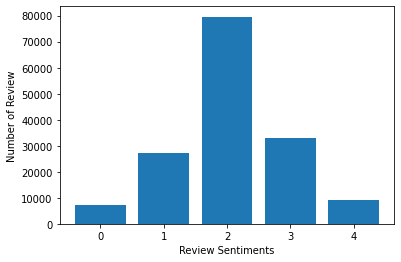

In [ ]:
from matplotlib import pyplot as plt
Sentiment_count=data.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(data['Phrase'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, data['Sentiment'], test_size=0.25, random_state=5)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

MultinomialNB()

In [ ]:
from sklearn import metrics
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)

In [ ]:
print(str('{:.2f}'.format(accuracy_score*100))+'%')

60.25%


N-grams

In [ ]:
cv = CountVectorizer(stop_words='english', ngram_range = (2,2), tokenizer = token.tokenize)
text_counts = cv.fit_transform(data['Phrase'])

#from sklearn.model_selection import train_test_split()
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, data['Sentiment'],test_size=0.25, random_state=5)


#Fitting the model
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

#form sklearn import metrics
accuracy_score = metrics.accuracy_score(MNB.predict(X_test), Y_test)
print(str('{:.2f}'.format(accuracy_score*100))+'%')

60.42%


In [ ]:
# trigram tokenization:
cv = CountVectorizer(stop_words='english', ngram_range = (3,3), tokenizer = token.tokenize)
text_counts = cv.fit_transform(data['Phrase'])
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, data['Sentiment'],test_size=0.25, random_state=5)
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)
accuracy_score = metrics.accuracy_score(MNB.predict(X_test), Y_test)
print(str('{:04.2f}'.format(accuracy_score*100))+'%')

58.87%


Naive bayes algorithms

In [ ]:
cv = CountVectorizer(stop_words='english', ngram_range=(1,1), tokenizer=token.tokenize)
text_count = cv.fit_transform(data['Phrase'])

X_train, X_test, Y_train, Y_test = train_test_split(text_count, data['Sentiment'], test_size=0.25, random_state=2)

from sklearn.naive_bayes import ComplementNB

#Fitting the model
CNB = ComplementNB()
CNB.fit(X_train, Y_train)

#evaluating the model
accuracy_score = metrics.accuracy_score(CNB.predict(X_test),Y_test)

print(str('{:4.2f}'.format(accuracy_score*100))+'%')

47.59%


In [ ]:
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()
BNB.fit(X_train, Y_train)
accuracy_score_bnb = metrics.accuracy_score(BNB.predict(X_test),Y_test)
print('BNB accuracy = ' + str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')

BNB accuracy = 60.63%


TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
text_count_2 = tfidf.fit_transform(data['Phrase'])

x_train, x_test, y_train, y_test = train_test_split(text_count_2, data['Sentiment'],test_size=0.25,random_state=5)

#compilimg the model -> we are going to use already used models MNB, CNB, BNB
#fitting the model
MNB.fit(x_train, y_train)
accuracy_score_mnb = metrics.accuracy_score(MNB.predict(x_test), y_test)
print('accuracy_score_mnb = '+str('{:4.2f}'.format(accuracy_score_mnb*100))+'%')

BNB.fit(x_train, y_train)
accuracy_score_bnb = metrics.accuracy_score(BNB.predict(x_test), y_test)
print('accuracy_score_bnb = '+str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')

CNB.fit(x_train, y_train)
accuracy_score_cnb = metrics.accuracy_score(CNB.predict(x_test), y_test)
print('accuracy_score_cnb = '+str('{:4.2f}'.format(accuracy_score_cnb*100))+'%')


accuracy_score_mnb = 58.53%
accuracy_score_bnb = 59.35%
accuracy_score_cnb = 51.46%


Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
LSVC = LinearSVC()

#on TF-IDF data
LSVC.fit(x_train, y_train)
accuracy_score_lsvc = metrics.accuracy_score(LSVC.predict(x_test), y_test)
print('accuracy_score_lsvc = '+str('{:4.2f}'.format(accuracy_score_lsvc*100))+'%')
#on CountVectorize data
LSVC.fit(X_train, Y_train)
accuracy_score_lsvc_CV = metrics.accuracy_score(LSVC.predict(X_test), Y_test)
print('accuracy_score_lsvc_cv = '+str('{:4.2f}'.format(accuracy_score_lsvc_CV*100))+'%')


accuracy_score_lsvc = 63.89%
accuracy_score_lsvc_cv = 63.07%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=20, random_state=5)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)

print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(classifier.score(X_train, Y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(classifier.score(X_test, Y_test)))

Accuracy of Random Forest classifier on training set: 0.86
Accuracy of Random Forest classifier on test set: 0.63
